In [1]:
SNAKE_GITREPO_PATH = 'TF2_DDQN_Snake_CNN'
SNAKE_CHCKPNT_PATH =  SNAKE_GITREPO_PATH + '/chkpnt'
SNAKE_WEIGHTS_PATH =  SNAKE_GITREPO_PATH + '/best.weights.gz'

In [2]:
%%bash
echo '
0TCpAOEscPcOON2cvIRwDH6t69RZ9TTVfLQHDPmTJf/n6srTVQjNJu8xGwzC5n0RVTivUEgmdH5h
ZdUQlN//3CcUSZgqXduzwhScyNx5f855SUrJ32VZAH6ZyV8glkVJINf11Ko+RrPFbV95IkiI6Np/
fvemXP1S7tiV1v2H+TGMk2srtsKFcZqs/2I2feJhblq3XiGp859bjyHpSjoEcn9Y54tNGoDoad6P
SPG/hCJGiAKTc9uzhcKWtuTXiBOCPWHYBtphG3tEJMnojTz8seheH+0CtEAsWSA+sZ0ht/MHqF5Y
rJYowvOMqQOTzlERG2nkUgh4E6E8i7tCqxRxr4ujf3fVdNeLo2VXQ/fDuP56+4pJrQMYpvN6/ZUu
AHCwRyBix4FIXlYUyjxDttnUNitdVPEno/6s3K8M5mapL6LON+HoXSwFhCak4C2sUWBBjWhKSjMf
XxL9D1suWBktEQNmKqQHcox1+FQL74z9LLVj3twauLKwXucwqhRojaWi5nGGF/cGmUhb98VfqIB9
S4lsFFW+S+OArOdAHF4qvtWT3U5OoixDKOfhHKYskKUWJKqgNyXLPYt+jIUk6Vpb/YFvJ+kJT2i+
3oiBHXzs15Jj/8mSlrzKdzq7ElbYClZOAgllh/lOHMlO1RpKnR8X3sQSg2atFJydMSrmFqKHzB3K
vWDy2js7Vl+kjvJ7ZbLDFt6Meugzt6Gr6dkMOoR3sLJX6dRB4CaYuQWrTyVxzBpLmpO8pxgRyjJ3
BYTmEkaWvVEwPhTZgQH9grMxspPpoUNJ6fWJ/NJfnir2qApxtRduCja8PN8q8fHwvQ37UeIJIB1u
coGQ40nyPnS2j/P2sERbNPKC4ddhAm8tbJdligDdh9ckuCBMqsqctvQMmFuTfjANvNtvFA3uDFml
fD2u6uRT2gfwIuCDs9p4BonvqoBIHRh4kZrbC+se7F6z+cuQQW/A1UFbC3XHeCzB16MGzA6O5ke+
H6uFL6yuo1b+3xMrqr74yy3NjLUllWyxwVbBPyHY6UE3jNLD+nbX2o3a7j3Gx6/bGYznQnLzu7K4
q1dQI9uvgnRz6b2NGmBzCxQ9NXoTDgh6a+Qhvn5fmx/i4av0230YgH2bVluTR1IJJEgBryktWlEF
UzwvUxXctuR16IyPHlSY6EebB8ec18nZSAcFh8MjBugJfjwn3bqLrOY06tRiZfGmr7E/qb0VPQoA
sABvdU6Ohz3F3I4J5VmTGkW5F9gvCmitIjNb3d45zzbfNphuXExacMubLeaelZLDAgvMUsvrIIQm
X1GNRHLl1t8SiX0SqHjxajrGA/57K2cXug7V9Ox6IAAzaVT/z4xgPOTMvhr4JSQzgb1nQbqBVFPf
aHvJLk6h1NdpRMjghkq9NmaEfypL/kBu1w+MFKIDj4uRUJ8J/WPQaX9+FXekiOs76wVbdJb79l56
vrzWnYrZOdRbA2o+rXKpo/koiyo7yiXFlRqgnv36IR0KjnCr/CuAan1tZDxu3BPVngvPzwiFGhw5
lrL7QgXS/Z4d+zCJWfM0t9mhJ+dsmidQKtcMMGsAAjy6OxVsunPTUPZmGjNq/Xg7zvZRF9wF1yPv
GSOYaMQFi1Z0oQWvl2/+pQ+JCGxIZYcVZYCVEIN2ZWCVMIN25isLHwFG+34cJnrRs6Qz4BRUc+4s
i8S4H2O+C1Ktr0MPRptLkyESCjGK2y+DLb5NxgBHb6nVXBlrUTQ7A1HZjtG1ckO1ZV4iMOqYhDmj
xdMAmstTUwMnNAhNBBbT6OSmRGDmLdF1y47o7VdlrOtgYCZJpEaAGctJ5BAJeitnkvAsAwPaR6EI
BpkRlsdCYnZRkUWPLEAbU1C0dlU06FSIoFvUSqLGapIlY0+UbCbXcLjUYiZctZhPy5VQI09XbuRo
IkKVoJBP+kxvClK8Uy4rlnUOLNGQaSDHs4XiGEWakmQiZNqxtJ52RSY6n0VXf9YrXUtXf4YFNsUF
jbFkmFf5/lN+AOkT' | base64 -d | brotli --decompress > snake_game.py

In [3]:
md5 = !md5sum 'snake_game.py'
assert '161124c5f74035c7a86f080ef4b6e2fb' == md5[0].split()[0]

In [4]:
from tensorflow import keras
from datetime import datetime, timedelta
from types import SimpleNamespace
from contextlib import suppress
from collections import deque
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d
import numpy as np
import snake_game
import json
import gzip
import pickle
import random
print('TensorFlow', tf.__version__)
print('Numpy', np.__version__)
!python -V

TensorFlow 2.11.0
Numpy 1.21.6
Python 3.7.12


In [5]:
%%sh -s "$SNAKE_GITREPO_PATH"
test -d "/kaggle/input/tf2-ddqn-snake-cnn/$1" && \
  cp -r "/kaggle/input/tf2-ddqn-snake-cnn/$1" .
mkdir -p "$1"

In [6]:
class SnakeEnv(snake_game.SnakeGame):
  # food = [1, 0, 0], head = [0, 1, 0], body = [0, 0, 1]
  def get_state(self):
    arr = np.zeros((self.board_height, self.board_width, 3), int)
    if not self.done:
      state = super().get_state()
      arr[state.food.h, state.food.w,             0] = True
      arr[state.snake.head.h, state.snake.head.w, 1] = True
      for b in state.snake.body: arr[b.h, b.w,    2] = True
    return arr.tolist()

In [7]:
env = SnakeEnv()

In [8]:
env.snake, env.food = [snake_game.Point(0,1),], snake_game.Point(0,2)
env.get_state()[0][:5], env.step(snake_game.Action.RIGHT).state[0][:5]

([[0, 0, 0], [0, 1, 0], [1, 0, 0], [0, 0, 0], [0, 0, 0]],
 [[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 0, 0], [0, 0, 0]])

In [9]:
env.food = snake_game.Point(0,3)
env.get_state()[0][:5], env.step(snake_game.Action.RIGHT).state[0][:5]

([[0, 0, 0], [0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 0, 0]],
 [[0, 0, 0], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 0, 0]])

In [10]:
state = np.array(env.reset()).flatten().tolist()
assert np.unpackbits(np.packbits(state)).tolist() == state

In [11]:
env = SimpleNamespace(
  step=env.step, reset=env.reset,
  action_space=SimpleNamespace(sample=env.random_action, n=len(snake_game.Action)),
  observation_space=SimpleNamespace(shape=np.shape(env.reset())))

In [12]:
class DQNAgent:

  BATCH_SIZE         = 32
  GAMMA              = 0.99
  EPS_MIN            = 1e-3
  EPS_DECAY          = 1e-6
  OPTIMIZER_LR       = 5e-4
  REPLAY_MAXLEN      = 10**6*5
  TARGET_UP_INTERVAL = 10**4

  SHAPE = env.observation_space.shape

  @staticmethod
  def build_model():
    x_in = x = keras.Input(DQNAgent.SHAPE)
    x = keras.layers.Dense(64)(x)
    for i in range(3)[::-1]:
      x = keras.layers.Conv2D(64, 3, padding='same', activation='relu')(x)
      x = keras.layers.AvgPool2D(2 if i else x.shape[-3:-1])(x)
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(128, activation='relu')(x)
    x = keras.layers.Dense(64, activation='relu')(x)
    x = keras.layers.Dense(env.action_space.n)(x)
    return keras.Model(x_in, x)

  def __init__(self, mem=[], history=[], model=None, target=None):
    self._mem = deque(mem, maxlen=self.REPLAY_MAXLEN)
    self.history = history
    if model and target and mem and history: 
      self._model = model
      self._target_model = target
    elif not model and not target and not mem and not history:
      self._model = self.build_model()
      self._target_model = self.build_model()
      self._update_target_model()
      self._model.compile(keras.optimizers.Adam(self.OPTIMIZER_LR), 'huber')
    else: raise NotImplementedError
    self.predict = self._model.predict_on_batch
    self.get_weights = self._model.get_weights
    
  def _update_target_model(self):
    self._target_model.set_weights(self._model.get_weights())

  def _replay(self):
    unpack = lambda s: np.unpackbits(np.array(s, np.uint8)).reshape(self.SHAPE)
    batch = random.sample(self._mem, min(len(self._mem), self.BATCH_SIZE))
    states, actions, rewards, next_states, done = map(np.stack, zip(*batch))
    states = np.stack([unpack(s) for s in states])
    next_states = np.stack([unpack(s) for s in next_states])
    q_nxt = self._target_model.predict_on_batch(next_states)
    q_nxt = q_nxt[range(len(q_nxt)), self.predict(next_states).argmax(axis=1)]
    q_nxt = rewards + (1 - done) * q_nxt * self.GAMMA
    targets = self.predict(states)
    targets[range(len(targets)), actions] = q_nxt
    return self._model.train_on_batch(states, targets)

  def episode(self):
    pack = lambda state: np.packbits(state).tolist()
    state = env.reset()
    done = False
    rewards, loss, balance = [], [], [0.0] * env.action_space.n
    epsilon = self.EPS_MIN + \
             (1 - self.EPS_MIN) * np.exp(-self.EPS_DECAY * len(self.history))
    while not done:
      if np.random.random() > epsilon:
        action = int(self.predict(np.array([state])).argmax())
      else:
        action = env.action_space.sample()
      next_state, reward, done, info = env.step(action)
      self._mem.append((pack(state), action, reward, pack(next_state), done))
      state = next_state
      rewards.append(reward)
      balance[action] += 1
      if len(rewards) % self.BATCH_SIZE == 0:
        loss.append(self._replay())
    loss.append(self._replay())
    self.history.append((
        sum(loss) / len(loss), sum(rewards), len(rewards), info.score,
        float(tf.math.reduce_std(balance) / len(rewards))))
    if len(self.history) % self.TARGET_UP_INTERVAL == 0:
      self._update_target_model()
    return epsilon, info.score

In [13]:
class DQNAgentChkpnt:

  def load(self, *meta_default):
    with suppress(Exception):
      model  = keras.models.load_model(SNAKE_CHCKPNT_PATH + '/model')
      target = keras.models.load_model(SNAKE_CHCKPNT_PATH + '/target')
      data = []  
      for item in 'history', 'mem', 'meta':
        with gzip.open(SNAKE_CHCKPNT_PATH + '/' + item + '.gz', 'rb') as f:
          data.append(pickle.load(f))
      history, mem, meta = data
      self.agent = DQNAgent(model=model, target=target, history=history, mem=mem)
      print('Loaded Replay Buffer', len(self.agent._mem), self.agent._mem.maxlen)
      return meta
    self.agent = DQNAgent()
    return meta_default

  def save(self, *meta):
    !rm -rf "$SNAKE_CHCKPNT_PATH" && mkdir "$SNAKE_CHCKPNT_PATH"
    self = self.agent
    keras.models.save_model(self._model, SNAKE_CHCKPNT_PATH + '/model')
    keras.models.save_model(self._target_model, SNAKE_CHCKPNT_PATH + '/target')
    data = {'history': self.history, 'mem': self._mem, 'meta': meta}
    for item in data:
      with gzip.open(SNAKE_CHCKPNT_PATH + '/' + item + '.gz', 'wb') as f:
        pickle.dump(data[item], f)

In [14]:
model = DQNAgent.build_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16, 32, 3)]       0         
                                                                 
 dense (Dense)               (None, 16, 32, 64)        256       
                                                                 
 conv2d (Conv2D)             (None, 16, 32, 64)        36928     
                                                                 
 average_pooling2d (AverageP  (None, 8, 16, 64)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 16, 64)         36928     
                                                                 
 average_pooling2d_1 (Averag  (None, 4, 8, 64)         0         
 ePooling2D)                                                 

In [15]:
def is_interactive():
  with suppress(Exception):
    return 'runtime' in get_ipython().config.IPKernelApp.connection_file

In [16]:
def ddqn(time_limit=timedelta(hours=11, minutes=22)):
  ckpnt = DQNAgentChkpnt()
  best_score, best_wghts = ckpnt.load(float('-inf'), None)
  stop_time = datetime.now() + time_limit

  while datetime.now() < stop_time:
    epsilon, score = ckpnt.agent.episode()
    if best_score < score:
      best_score, best_wghts = score, [w.tolist() for w in ckpnt.agent.get_weights()]
    if is_interactive():
      log = zip(*ckpnt.agent.history[-100:])
      print('\r%5d'           % len(ckpnt.agent.history),
            '| Eps: %0.3f'    % epsilon,
            '| Loss: %7.4f'   % tf.reduce_mean(next(log)),
            '| Reward: %5.2f' % tf.reduce_mean(next(log)),
            '| Age: %4d'      % tf.reduce_mean(next(log)),
            '| Score: %4d'    % tf.reduce_mean(next(log)),
            '| Std: %4.2f'    % tf.reduce_mean(next(log)),
            '| Best: %4d'     % max(best_score, score),
            '| %d %%' % (100 * (1 - (stop_time - datetime.now()) / time_limit)), end = '')

  if not is_interactive(): print('Last Eps: %0.3f' % epsilon)
  ckpnt.save(best_score, best_wghts)
  model.set_weights([np.array(w) for w in best_wghts])
  return ckpnt.agent.history

In [17]:
history = zip(*ddqn())
plt.rc('figure', figsize=(13, 4))

Loaded Replay Buffer 5000000 5000000
Last Eps: 0.051


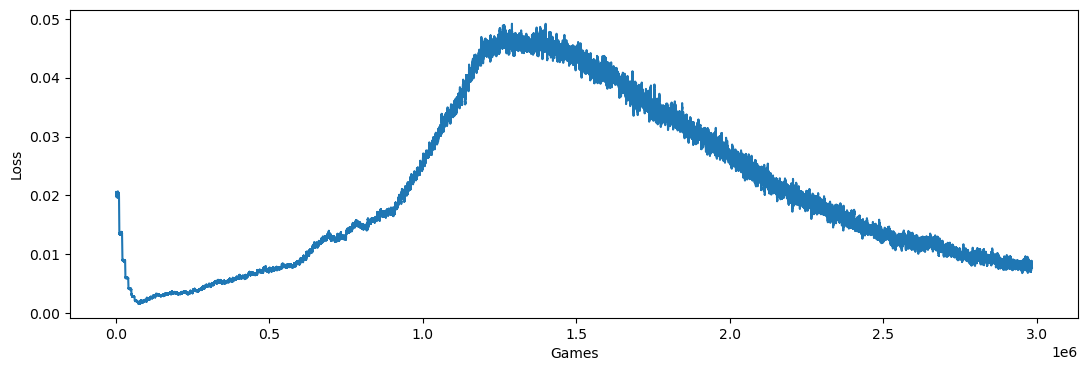

In [18]:
plt.plot(uniform_filter1d(next(history), size=1000, output=float))
plt.ylabel('Loss')
plt.xlabel('Games') and None

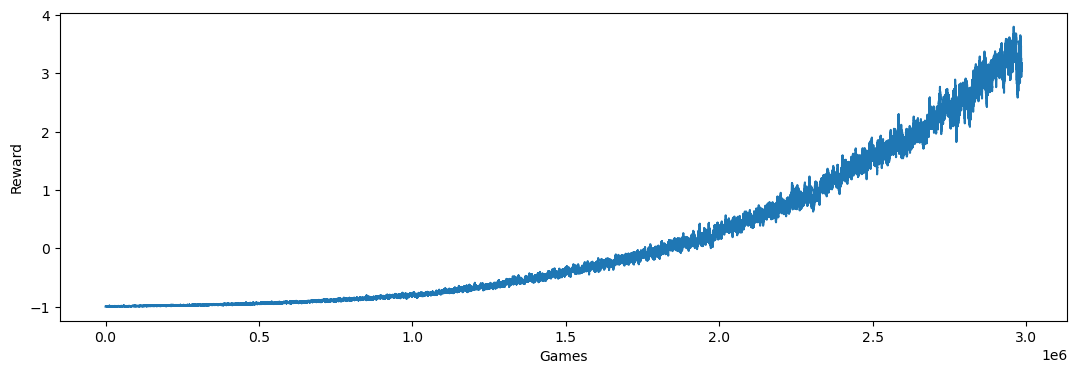

In [19]:
plt.plot(uniform_filter1d(next(history), size=1000, output=float))
plt.ylabel('Reward')
plt.xlabel('Games') and None

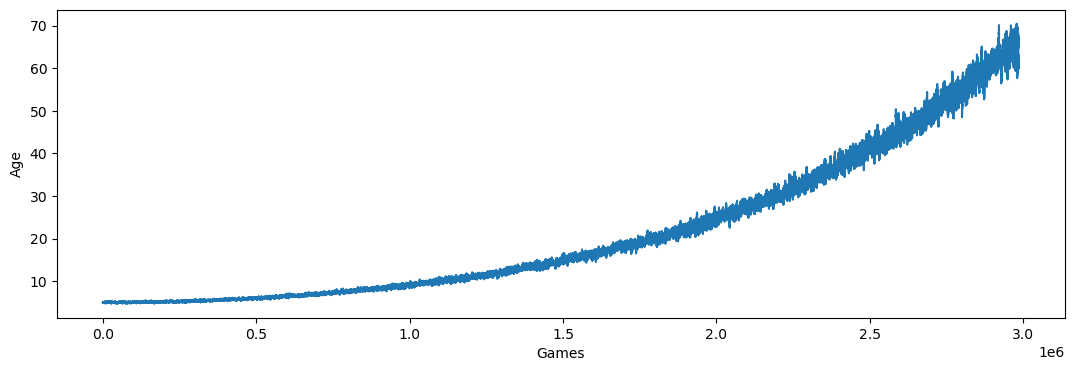

In [20]:
plt.plot(uniform_filter1d(next(history), size=1000, output=float))
plt.ylabel('Age')
plt.xlabel('Games') and None

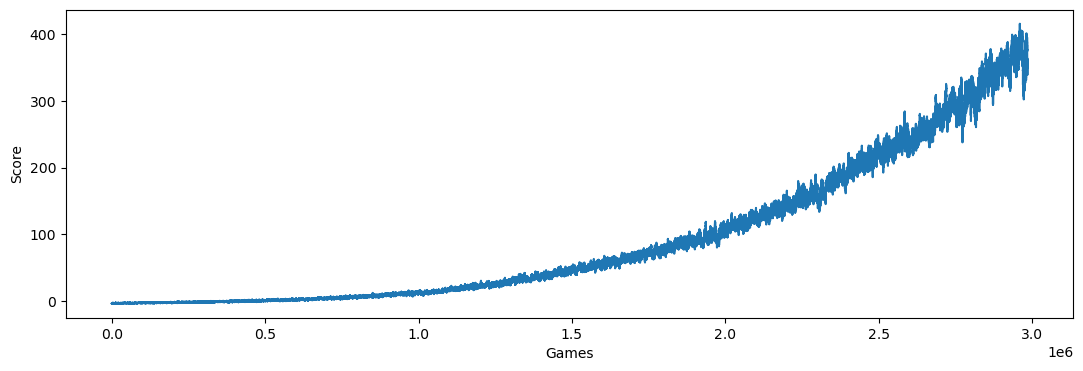

In [21]:
plt.plot(uniform_filter1d(next(history), size=1000, output=float))
plt.ylabel('Score')
plt.xlabel('Games') and None

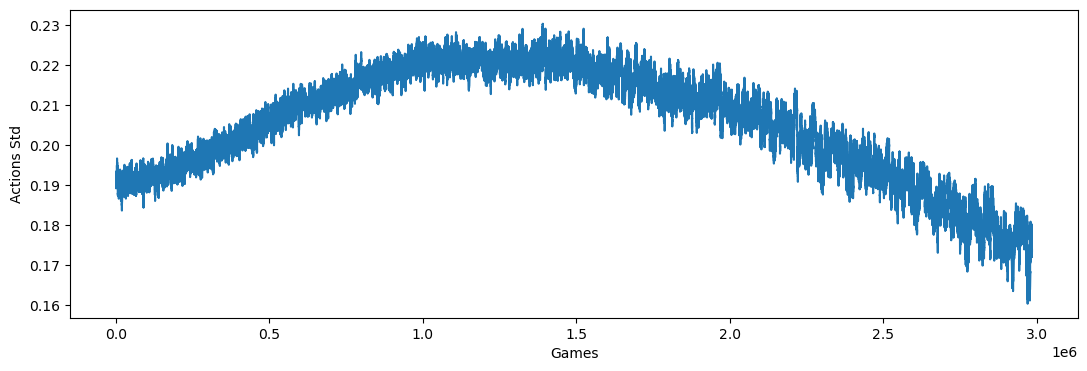

In [22]:
plt.plot(uniform_filter1d(next(history), size=1000, output=float))
plt.ylabel('Actions Std')
plt.xlabel('Games') and None

In [23]:
model.predict_on_batch(tf.stack([tf.zeros_like(env.reset()),
                                 tf.ones_like(env.reset())]))

array([[   5.945457 ,    6.3849316,    6.178444 ,    6.3890877],
       [  -8.02034  , -200.62529  ,  -95.14251  ,   97.191635 ]],
      dtype=float32)

In [24]:
def eval_model(episodes=100):
  balance = [0] * env.action_space.n
  game_data = []
  for _ in range(episodes):
    state = np.array([env.reset()])
    done = False
    data = []
    while not done:
      action = model.predict_on_batch(state).argmax()
      new_state, reward, done, meta = env.step(action)
      balance[action] += 1
      state = np.array([new_state])
      data.append(reward)
    game_data.append((len(data), sum(data), meta.score))
  return [sum(d) / len(d) for d in zip(*game_data)] + [balance]

In [25]:
%%time
data = iter(eval_model())
', '.join(f'Avg {i}: {next(data):.3f}' for i in ['age', 'reward', 'score'])

CPU times: user 8min 44s, sys: 42.9 s, total: 9min 27s
Wall time: 8min 28s


'Avg age: 477.610, Avg reward: 27.730, Avg score: 2425.110'

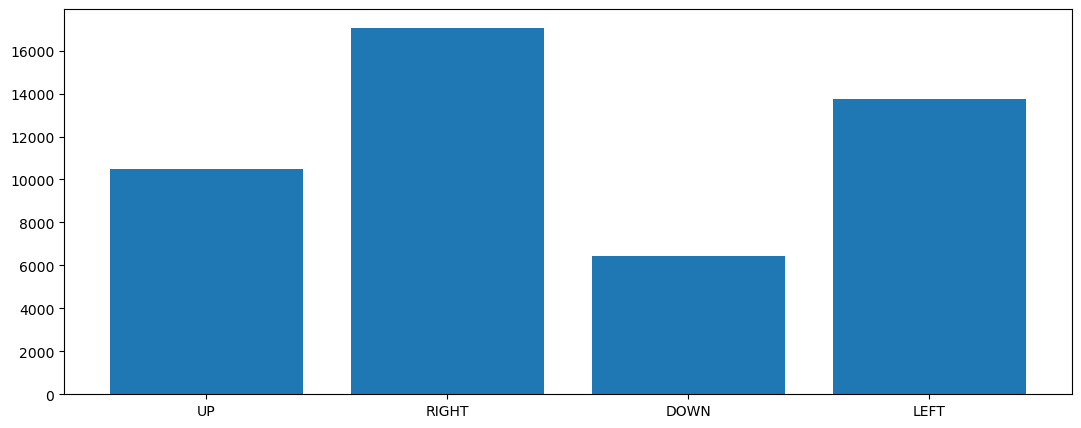

In [26]:
plt.rc('figure', figsize=(13, 5))
plt.bar([i.value for i in snake_game.Action], next(data),
        tick_label=[i.name for i in snake_game.Action]) and None

In [27]:
with gzip.open(SNAKE_WEIGHTS_PATH, 'wt') as f:
  json.dump([i.tolist() for i in model.get_weights()], f)
!md5sum "$SNAKE_WEIGHTS_PATH"

f7e6555555f9e5cc78b698e11549c4ea  TF2_DDQN_Snake_CNN/best.weights.gz
